## 4.4 기울기

$x_0$과 $x_1$에 대한 편미분을 동시에 계산해 $\left( \frac{\partial f}{\partial x_0},\ \frac{\partial f}{\partial x_1} \right)$로 나타내면 이를 기울기 벡터라고 한다.

In [3]:
import numpy as np
import matplotlib.pylab as plt

def function_test_2(x):
    return x[0] ** 2 + x[1] ** 2

def numerical_gradient(f, x): # x는 [x_0, x_1, ...]이다
    h = 1e-4
    grad = np.zeros_like(x) # x와 shape이 같도록 초기화해둠

    for idx in range(x.size):
        tmp_val = x[idx] # x_0 -> x_1 -> ...

        # f(x+h) 계산
        x[idx] = tmp_val + h # 해당하는 변수에 대해서만 변화량을 구한다
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val # 다음 변수에 대한 편미분을 위해 복구한다
    
    return grad # (x_0에 대한 편미분, x_1에 대한 편미분, ...)

g1 = numerical_gradient(function_test_2, np.array([3.0, 4.0]))
g2 = numerical_gradient(function_test_2, np.array([0.0, 2.0]))
g3 = numerical_gradient(function_test_2, np.array([3.0, 0.0]))

print(g1)
print(g2)
print(g3)

[6. 8.]
[0. 4.]
[6. 0.]


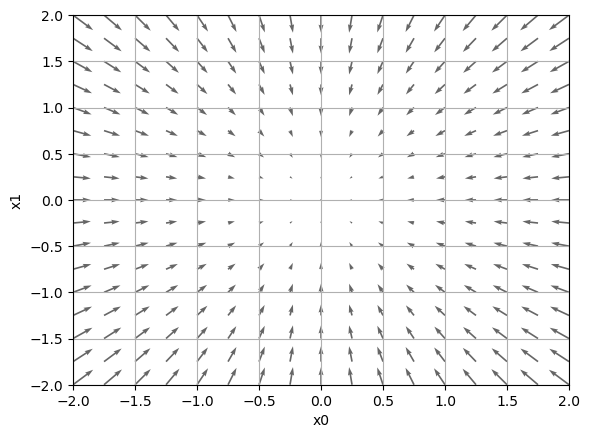

In [ ]:
# 기울기 벡터 장 그려보기

def numerical_gradient_batch(f, X):
    if X.ndim == 1:
        return numerical_gradient(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient(f, x)
        
        return grad

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

# grad = numerical_gradient_batch(function_test_2, np.array([X, Y]) )
grad = numerical_gradient_batch(function_test_2, np.stack((X, Y), axis=1)) # ChatGPT가 고쳐줌

plt.figure()
# plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.quiver(X, Y, -grad[:, 0], -grad[:, 1], angles="xy", color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
# plt.legend()
plt.draw()
plt.show()

기울기가 가리키는 방향은? **함수의 출력 값을 가장 크게 줄이는 방향**

## 경사법 (여기선 경사 하강법)

- 신경망 학습의 목표 - 최적의 매개변수 찾기
- 최적이란? 손실 함수가 최솟값이 될 때의 매개변수
- 손실 함수의 최솟값을 어떻게 구해야 하나... 너무 복잡한데 -> 기울기를 이용해 최솟값, 혹은 현 상태에서 가능한 작은 값을 찾으려는 기법이 **경사법**

\* 단, 항상 기울기가 가리키는 곳에 함수의 최솟값이 있다는 보장은 불가능함. 극속삾이나 안장점일 수 있음.

&nbsp;

$
x_0 \leftarrow x_0 - \eta \frac{\partial f}{\partial x_0}
\\
x_1 \leftarrow x_1 - \eta \frac{\partial f}{\partial x_1}
$

- 부호를 반전시켜야 한다. 그래야 해당 방향으로 갱신할 수 있다.
- $\eta$는 갱신하는 정도, 양을 의미하며, 학습률이라고 한다.
- 위의 식은 한 번 갱신하는 것을 보여주고 있으며, 실제로는 이 단계를 반복한다. 여러 번 반복하며 함수의 값을 줄이게 된다.
- 식에서는 변수가 2개이지만, 더 많아져도 같은 식으로 갱신한다.

\* 학습률은 0.01, 0.001 등 미리 특정한 값으로 세팅해둔다. 적절하게 변경해가면서 확인한다.

In [54]:
# 경사 하강법의 구현
def gradient_descent(f, init_x, lr, step_num):
    x = init_x.copy()
    for i in range(step_num):
        grad = numerical_gradient(f, x) # 기울기를 구하고
        x -= lr * grad # 학습률을 곱해서 뺀다
    return x

# Q. 경사법으로 f(x_0, x_1) = x_0^2 + x_1^2의 최솟값을 구하라
init_x = np.array([-3.0, 4.0]) # 임의로 초깃값 세팅
ans = gradient_descent(function_test_2, init_x=init_x, lr=0.1, step_num=100)
print(ans)

# [-6.11110793e-10  8.14814391e-10]
# 실제 최솟값이 {0, 0)에 근접했다

[-6.11110793e-10  8.14814391e-10]


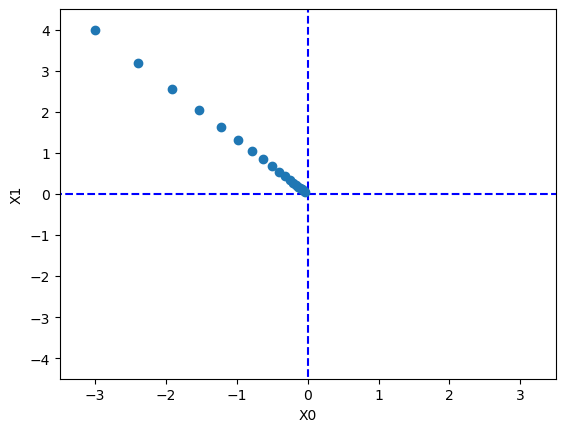

In [9]:
import numpy as np
# 경사법을 이용한 갱신 과정 시각화
def gradient_descent_history(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent_history(function_test_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [ ]:
# 학습률이 너무 큰 예
init_x = np.array([-3.0, 4.0])
bad_ans1 = gradient_descent(function_test_2, init_x=init_x, lr=10.0, step_num=100)
print(bad_ans1)

# 너무 작은 예
bad_ans2 = gradient_descent(function_test_2, init_x=init_x, lr=1e-10, step_num=100)
print(bad_ans2)

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


In [ ]:
# 신경망에서 기울기 구해보기

# SimpleNet
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리를 path에 넣어 common 모듈을 가져옴
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 임의 초기화 (2 * 3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

## 추론

net = SimpleNet()
print(net.W) # 매번 달라짐

x = np.array([0.6, 0.9])
p = net.predict(x)
print("추론 결과:", p)
print("최대값의 인덱스:", np.argmax(p))

## 손실함수
t = np.array([0, 0, 1]) # 여기서만 사용할 임의의 정답 레이블
loss = net.loss(x, t)
print("손실함수 출력:", loss)

## 기울기 구해보기

def f(W):
    return net.loss(x, t)
dW = numerical_gradient(f, net.W)
print("가중치의 기울기:", dW)

## 이제 뭐 해야하지? 이렇게 나온 기울기를 가지고 가중치 매개변수를 갱신하면 된다


[[ 0.34034694 -1.24689242  0.48647687]
 [-1.37222981 -0.60426795  0.78196533]]
추론 결과: [-1.03079866 -1.2919766   0.99565492]
최대값의 인덱스: 2
손실함수 출력: 0.20970044427023543
가중치의 기울기: [[ 0.06412122  0.04938257 -0.11350379]
 [ 0.09618183  0.07407385 -0.17025568]]
